<a href="https://colab.research.google.com/github/Rabita2005/weatherwise/blob/main/WeatherWise_project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display




🌦️ WeatherWise - Advanced Weather Application

Welcome to my **WeatherWise** project notebook! This application retrieves weather data using an external API, visualizes temperature and precipitation forecasts, and allows users to ask natural language questions about the weather using a large language model (LLM).


# ## 🧰 Setup and Imports
# This section installs and imports the necessary Python packages for the project.
# - `requests`: To make HTTP requests (though `fetch-my-weather` wraps this).
# - `matplotlib`: For creating visualizations (temperature and precipitation graphs).
# - `pyinputplus`: For handling user input validation (not strictly needed with ipywidgets, but kept if you plan command-line interaction).
# - `fetch-my-weather`: A custom library to simplify fetching weather data from a specific API.
# - `hands-on-ai`: A custom library for interacting with AI models (specifically for the NLP question answering part).
# - `ipywidgets`: To create interactive elements in the Jupyter notebook.

# If you're running this notebook in **Google Colab** or a similar environment, uncomment the following lines to ensure all packages are installed.
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub

In [ ]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus
!pip install fetch-my-weather
!pip install matplotlib





In [ ]:
# Example for local Ollama (verify hands-on-ai compatibility)
import os
os.environ['HANDS_ON_AI_SERVER'] = 'http://localhost:11434' # Default Ollama local address
os.environ['HANDS_ON_AI_MODEL'] = 'llama2' # Or the name of the model you pulled
os.environ['HANDS_ON_AI_API_KEY'] = '' # Local Ollama usually doesn't need a key, but check library docs
# ... rest of setup

In [ ]:
# %%
import os
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pyinputplus as pyip # Imported, but primarily using ipywidgets for UI
import ipywidgets as widgets
from IPython.display import display, clear_output

# Import custom libraries after installation
from fetch_my_weather import get_weather # Function to fetch weather data
# Make sure get_response is imported correctly
from hands_on_ai.chat import get_response # Function to get response from AI model

# --- Environment Setup for Hands-on-AI ---
# Set environment variables required for the hands-on-ai library.
# You will need to replace the placeholder values with the actual server address and model name.
# The API key will be read from an environment variable or prompted if not set.

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au' # Replace with your Hands-on-AI server URL
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2' # Replace with the LLM model name you want to use

# We prioritize getting the key from an environment variable.
api_key = os.getenv('HANDS_ON_AI_API_KEY')

if api_key:
    print("Hands-on-AI API key found in environment variable.")
    os.environ['HANDS_ON_AI_API_KEY'] = api_key
    print("API key successfully set in os.environ.")
else:
    print("Hands-on-AI API key not found in environment variable.")
    # Fallback: Try interactive input. This might fail in non-interactive environments.
    try:
        print("Attempting to prompt for API key interactively...")
        api_key_input = pyip.inputPassword('Enter your Hands-on-AI API key: ')
        os.environ['HANDS_ON_AI_API_KEY'] = api_key_input
        print("API key set from interactive input.")
    except Exception as e:
        print(f"Could not get API key interactively: {e}")
        print("Please set the HANDS_ON_AI_API_KEY environment variable before running the notebook.")
        os.environ['HANDS_ON_AI_API_KEY'] = '' # Set to empty string if neither method works

# --- Verification Step ---
# Check if the API key is actually set in the environment after attempts
current_api_key = os.environ.get('HANDS_ON_AI_API_KEY')
if current_api_key:
    print(f"Current HANDS_ON_AI_API_KEY is set (Length: {len(current_api_key)}).")
    # WARNING: Do NOT print the key itself if it's sensitive!
    # print(f"Current HANDS_ON_AI_API_KEY: {current_api_key}") # <-- Use ONLY for debugging, be careful!
else:
     print("Warning: HANDS_ON_AI_API_KEY is NOT set. AI features WILL NOT work.")

# Ensure get_response function is correctly imported
# from hands_on_ai.chat import get_response # Already imported above, just a reminder

Hands-on-AI API key found in environment variable.
API key successfully set in os.environ.
Current HANDS_ON_AI_API_KEY is set (Length: 32).


## 📦 Setup and Configuration
Import required packages and setup environment.

In [ ]:
# ## 📦 Data Fetching Function
#
# This section defines the core function to retrieve weather data using the `fetch-my-weather` library.
#
# %%
# Define get_weather_data() function here
def get_weather_data(location):
    """
    Retrieve weather data for a specified location using fetch_my_weather.

    Args:
        location (str): City or location name.

    Returns:
        dict: Weather data including current conditions and forecast (converted to dictionary),
              or None if an error occurs or no data is found.
    """
    # Use the imported get_weather function from fetch_my_weather
    # fetch_my_weather.get_weather returns a Pydantic WeatherResponse object
    try:
        # Call get_weather with the location and specify json format to get structured data
        # Note: Even with format='json', the function returns a Pydantic object,
        # which we will convert to a dictionary using .model_dump()
        print(f"Attempting to fetch weather data for: {location}")
        weather_response = get_weather(location, format='json')

        # Check if the response object is valid and has weather data
        if weather_response and weather_response.weather:
            # Convert the Pydantic object to a dictionary for easier processing
            weather_data_dict = weather_response.model_dump()
            print("Successfully fetched and processed weather data.")
            return weather_data_dict
        else:
            print(f"No weather data found for {location}.")
            return None

    except Exception as e:
        # Catch any exceptions during the API call or data processing
        print(f"Error fetching weather data for {location}: {e}")
        print("Please ensure the location is valid and the weather service is available.")
        return None


## 🌤️ Weather Data Functions

In [ ]:
# Define get_weather_data() function here
def get_weather_data(location, forecast_days=5):
    """
    Retrieve weather data for a specified location.

    Args:
     question (str): User's weather-related question.

 Returns:
     str: The original question (or potentially a simplified/cleaned version).
 """
 # In a more complex app, this might extract location, date, weather attribute etc.
 # For this LLM-based approach, we just return the question.

    try:
        # Call get_weather with just the location and format='json'
        # The number of forecast days is not a direct argument to this function
        weather_data = get_weather(location, format='json')
        return weather_data
    except Exception as e:
        print(f"Error fetching weather data for {location}: {e}")
        print("Please ensure the location is valid and the weather service is available.")
        return None

## 📊 Visualisation Functions

In [ ]:
# This section contains functions to create visual representations of the weather data using `matplotlib`.
# Define create_temperature_visualisation() and create_precipitation_visualisation() here

def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data (Max and Min temperature forecast).

    Args:
        weather_data (dict): The processed weather data dictionary (output from model_dump).
                             Expected structure includes 'weather' key with a list of daily forecasts.
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure object.

    Returns:
        If output_type is 'figure', returns the matplotlib figure object.
        Otherwise, displays the visualisation in the notebook using plt.show().
        Returns None if no valid data is available.
    """
    # Validate input data structure
    if not weather_data or 'weather' not in weather_data or not weather_data['weather']:
        print("No weather forecast data available for temperature visualization.")
        if output_type == 'figure':
            return None
        else:
            return

    dates = []
    max_temps = []
    min_temps = []

    # Iterate through the daily forecast data
    for day_forecast in weather_data['weather']:
        try:
            # Extract date, max temp, and min temp for each day
            date_str = day_forecast.get('date')
            max_temp_str = day_forecast.get('maxtempC')
            min_temp_str = day_forecast.get('mintempC')

            # Ensure required data is present and can be converted
            if date_str and max_temp_str is not None and min_temp_str is not None:
                 # Parse date string into datetime object
                date_obj = datetime.strptime(date_str, '%Y-%m-%d')
                dates.append(date_obj)
                # Convert temperature strings to floats
                max_temps.append(float(max_temp_str))
                min_temps.append(float(min_temp_str))
            else:
                 print(f"Skipping day due to missing or invalid temperature data: {day_forecast}")


        except (ValueError, TypeError) as e:
            # Handle potential errors during data conversion
            print(f"Could not process temperature data for a day ({day_forecast}): {e}")
            continue # Skip this day if data is malformed

    # Check if any valid data was collected
    if not dates:
        print("No valid temperature data found for visualization after processing.")
        if output_type == 'figure':
            return None
        else:
            return

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(dates, max_temps, marker='o', linestyle='-', label='Max Temp (°C)')
    ax.plot(dates, min_temps, marker='o', linestyle='-', label='Min Temp (°C)')

    ax.set_title('Temperature Forecast')
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()
    ax.grid(True) # Add a grid for better readability

    # Format the x-axis to show dates nicely
    fig.autofmt_xdate() # Auto-formats the date labels to prevent overlap
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Format dates as YYYY-MM-DD
    ax.xaxis.set_major_locator(mdates.DayLocator()) # Ensure ticks are on each day


    plt.tight_layout() # Adjust layout to prevent labels overlapping

    # Return figure object or display based on output_type
    if output_type == 'figure':
        return fig
    else:
        plt.show()


def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of hourly precipitation data.

    Args:
        weather_data (dict): The processed weather data dictionary (output from model_dump).
                             Expected structure includes 'weather' key with daily forecasts,
                             each containing an 'hourly' list.
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure object.

    Returns:
        If output_type is 'figure', returns the matplotlib figure object.
        Otherwise, displays the visualisation in the notebook using plt.show().
        Returns None if no valid data is available.
    """
    # Validate input data structure
    if not weather_data or 'weather' not in weather_data or not weather_data['weather']:
        print("No weather forecast data available for precipitation visualization.")
        if output_type == 'figure':
            return None
        else:
            return

    dates = []
    hourly_precipitation = [] # We'll collect hourly data for all days

    # Iterate through each day's forecast
    for day_forecast in weather_data['weather']:
         date_str = day_forecast.get('date')
         hourly_data = day_forecast.get('hourly', []) # Get the list of hourly data for the day

         if not hourly_data:
             print(f"No hourly data available for date: {date_str}. Skipping.")
             continue # Skip this day if no hourly data is present

         # Iterate through the hourly data for the current day
         for hour_data in hourly_data:
             try:
                # Extract time string (e.g., "0", "300", "1500", "1800")
                time_str = hour_data.get('time')
                precipitation_str = hour_data.get('precipMM', '0') # Default to '0' if missing

                # Validate that time_str is not None before conversion
                if time_str is None:
                    print(f"Skipping hourly data point due to missing time string: {hour_data}")
                    continue

                # --- Modified Time Parsing ---
                # The 'time' value appears to be hours multiplied by 100 (HH00 format),
                # or simply '0' for midnight. We need to handle this format.
                if time_str == '0':
                    # Handle midnight explicitly
                    time_formatted = "00:00"
                else:
                    # Assume format is 'HH00' (or similar)
                    # Extract the hour part (first 1 or 2 digits) and format it
                    # This is a bit of a heuristic based on the sample data ('1500', '1800')
                    # A more robust parser might be needed if the format varies significantly.
                    # Let's try extracting the hour based on string length.
                    if len(time_str) >= 2:
                        hour_part = time_str[:-2] # Get everything except the last two characters
                        if hour_part == '': # Handle cases like "00" -> 00:00
                             hour_str = "00"
                        else:
                             hour_str = hour_part.zfill(2) # Ensure it's two digits
                        time_formatted = f"{hour_str}:00" # Assuming minutes are always 00 in this format
                    else:
                        # Handle unexpected formats, default to midnight or skip
                        print(f"Unexpected time format: {time_str}. Skipping this hour.")
                        continue
                # --- End Modified Time Parsing ---


                # Combine date and formatted time string and parse into datetime object
                datetime_str = f"{date_str} {time_formatted}"
                # Ensure the combined string matches the datetime format exactly
                datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M')
                dates.append(datetime_obj)

                # Convert precipitation string to float, handling potential errors
                precipitation = float(precipitation_str)
                hourly_precipitation.append(precipitation)

             except (ValueError, TypeError) as e:
                 # Print details of the data point that caused the error for debugging
                 print(f"Error processing hourly data for date {date_str}, raw hour data: {hour_data}. Error: {e}. Skipping this hour.")
                 continue # Skip this specific hour data point if malformed


    # Check if any valid data was collected after processing all hours
    if not dates:
        print("No valid precipitation data found for visualization after processing.")
        if output_type == 'figure':
            return None
        else:
            return

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create a bar plot for precipitation
    # Width is in units of the x-axis (dates/times). Adjust as needed.
    ax.bar(dates, hourly_precipitation, width=0.04, label='Precipitation (mm)')

    ax.set_title('Precipitation Forecast')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Precipitation (mm)')
    ax.legend()
    ax.grid(axis='y') # Grid on y-axis is usually better for bar plots

    # Format the x-axis to show dates and times nicely
    fig.autofmt_xdate() # Auto-formats date/time labels
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) # Format as YYYY-MM-DD HH:MM
    ax.xaxis.set_major_locator(mdates.AutoDateLocator()) # Let matplotlib choose suitable date/time intervals

    plt.tight_layout() # Adjust layout

    # Return figure object or display based on output_type
    if output_type == 'figure':
        return fig
    else:
        plt.show()


## 🤖 Natural Language Processing

In [ ]:
# This section defines functions for handling natural language weather questions using an LLM.
# `parse_weather_question` is a placeholder as LLMs can directly process the raw question and weather data.
# `generate_weather_response` uses the `hands-on-ai` library to get a response from the configured LLM.
#
# %%
# Define parse_weather_question() and generate_weather_response() here

# Note: For simplicity and leveraging the LLM's capabilities,
# we will skip a complex rule-based parse_weather_question function.
# Instead, we will pass the raw question and the weather data directly to the LLM
# for it to interpret and generate a response.
def parse_weather_question(question):
     """
     Placeholder function. In this implementation, parsing is handled by the LLM.
     Returns the original question.

     Args:
         question (str): User's weather-related question.

     Returns:
         str: The original question (or potentially a simplified/cleaned version).
     """
     # In a more complex app, this might extract location, date, weather attribute etc.
     # For this LLM-based approach, we just return the question.
     return question


def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question using an LLM.

    Args:
    parsed_question (str): The user's question (already 'parsed' by returning the original question).
    weather_data (dict): The detailed weather data dictionary (output from get_weather_data).

Returns:
    str: Natural language response generated by the LLM, or an error message.
"""
# --- Modified for Safe Execution when LLM Server is Inaccessible ---
# If the LLM server is not accessible or configured,
# return an informative message instead of attempting to call get_response.
# You can uncomment the original LLM code below once you have a working server and API key.

# This section defines functions for handling natural language weather questions using an LLM.
# `parse_weather_question` is a placeholder as LLMs can directly process the raw question and weather data.
# `generate_weather_response` uses the `hands-on-ai` library to get a response from the configured LLM.
#
# %%
# Define parse_weather_question() and generate_weather_response() here

# Note: For simplicity and leveraging the LLM's capabilities,
# we will skip a complex rule-based parse_weather_question function.
# Instead, we will pass the raw question and the weather data directly to the LLM
# for it to interpret and generate a response.
def parse_weather_question(question):
     """
     Placeholder function. In this implementation, parsing is handled by the LLM.
     Returns the original question.

     Args:
         question (str): User's weather-related question.

     Returns:
         str: The original question (or potentially a simplified/cleaned version).
     """
     # In a more complex app, this might extract location, date, weather attribute etc.
     # For this LLM-based approach, we just return the question.
     return question


def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question using an LLM.

    Args:
    parsed_question (str): The user's question (already 'parsed' by returning the original question).
    weather_data (dict): The detailed weather data dictionary (output from get_weather_data).

    Returns:
        str: Natural language response generated by the LLM, or an error message.
    """
    # --- Modified for Safe Execution when LLM Server is Inaccessible ---
    # If the LLM server is not accessible or configured,
    # return an informative message instead of attempting to call get_response.
    # You can uncomment the original LLM code below once you have a working server and API key.

    # Check if weather data is available (still needed even without LLM call)
    if not weather_data:
        return "I could not retrieve weather data to answer that question."

    # ** COMMENT OUT OR REMOVE THE LLM CALL BELOW IF SERVER IS INACCESSIBLE **
    # try:
    #     weather_data_str = str(weather_data) # Convert dictionary to string for the prompt
    #     prompt = f"""
    #     You are a helpful weather assistant. Answer the user's question based *only* on the provided weather data.
    #     If you cannot find the answer in the data, politely say so.

    #     Weather Data:
    #     {weather_data_str[:4000]}... # Limit data length

    #     User Question:
    #     {parsed_question}

    #     Answer:
    #     """
    #     print("Sending prompt to LLM...")
    #     llm_response = get_response(prompt) # <--- This line caused the error
    #     print("Received response from LLM.")

    #     if llm_response:
    #         return llm_response.strip()
    #     else:
    #         return "I did not receive a response from the weather AI. Please try again."

    # except Exception as e:
    #     print(f"Error generating AI response: {e}")
    #     return f"An error occurred while trying to answer your question: {e}"
    # --- End of LLM Call Section ---


    # ** Add a placeholder message here if the LLM call is commented out **
    return "AI weather questions are currently unavailable due to a server connection issue. Please try again later."
# try:
#     weather_data_str = str(weather_data) # Convert dictionary to string for the prompt
#     prompt = f"""
#     You are a helpful weather assistant. Answer the user's question based *only* on the provided weather data.
#     If you cannot find the answer in the data, politely say so.

#     Weather Data:
#     {weather_data_str[:4000]}... # Limit data length

#     User Question:
#     {parsed_question}

#     Answer:
#     """
#     print("Sending prompt to LLM...")
#     llm_response = get_response(prompt) # <--- This line caused the error
#     print("Received response from LLM.")

#     if llm_response:
#         return llm_response.strip()
#     else:
#         return "I did not receive a response from the weather AI. Please try again."

# except Exception as e:
#     print(f"Error generating AI response: {e}")
#     return f"An error occurred while trying to answer your question: {e}"
# --- End of LLM Call Section ---

# This section defines functions for handling natural language weather questions using an LLM.
# `parse_weather_question` is a placeholder as LLMs can directly process the raw question and weather data.
# `generate_weather_response` uses the `hands-on-ai` library to get a response from the configured LLM.
#
# %%
# Define parse_weather_question() and generate_weather_response() here

# Note: For simplicity and leveraging the LLM's capabilities,
# we will skip a complex rule-based parse_weather_question function.
# Instead, we will pass the raw question and the weather data directly to the LLM
# for it to interpret and generate a response.
def parse_weather_question(question):
     """
     Placeholder function. In this implementation, parsing is handled by the LLM.
     Returns the original question.

     Args:
         question (str): User's weather-related question.

     Returns:
         str: The original question (or potentially a simplified/cleaned version).
     """
     # In a more complex app, this might extract location, date, weather attribute etc.
     # For this LLM-based approach, we just return the question.
     return question


def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question using an LLM.

    Args:
    parsed_question (str): The user's question (already 'parsed' by returning the original question).
    weather_data (dict): The detailed weather data dictionary (output from get_weather_data).

    Returns:
        str: Natural language response generated by the LLM, or an error message.
    """
    # --- Modified for Safe Execution when LLM Server is Inaccessible ---
    # If the LLM server is not accessible or configured,
    # return an informative message instead of attempting to call get_response.
    # You can uncomment the original LLM code below once you have a working server and API key.

    # Check if weather data is available (still needed even without LLM call)
    if not weather_data:
        return "I could not retrieve weather data to answer that question."

    # ** COMMENT OUT OR REMOVE THE LLM CALL BELOW IF SERVER IS INACCESSIBLE **
    # try:
    #     weather_data_str = str(weather_data) # Convert dictionary to string for the prompt
    #     prompt = f"""
    #     You are a helpful weather assistant. Answer the user's question based *only* on the provided weather data.
    #     If you cannot find the answer in the data, politely say so.

    #     Weather Data:
    #     {weather_data_str[:4000]}... # Limit data length

    #     User Question:
    #     {parsed_question}

    #     Answer:
    #     """
    #     print("Sending prompt to LLM...")
    #     llm_response = get_response(prompt) # <--- This line caused the error
    #     print("Received response from LLM.")

    #     if llm_response:
    #         return llm_response.strip()
    #     else:
    #         return "I did not receive a response from the weather AI. Please try again."

    # except Exception as e:
    #     print(f"Error generating AI response: {e}")
    #     return f"An error occurred while trying to answer your question: {e}"
    # --- End of LLM Call Section ---


    # ** Add a placeholder message here if the LLM call is commented out **
    return "AI weather questions are currently unavailable due to a server connection issue. Please try again later."


## 🧭 User Interface

In [ ]:
# ## 🧭 User Interface (UI) with ipywidgets
#
# This section sets up interactive widgets for the user interface in the notebook environment.
#
# %%
# Initialize ipywidgets for interactive input and output.
# These widgets provide text input for location and questions, buttons to trigger actions,
# and output areas to display results (graphs and AI answers).

# Text input for the city/location
location_input = widgets.Text(
    value='Perth', # Default value
    placeholder='Enter city name',
    description='Location:',
    disabled=False,
    layout=widgets.Layout(width='50%') # Adjust width
)

# Button to trigger fetching weather data and displaying graphs
check_button = widgets.Button(
    description='Get Weather & Graphs',
    disabled=False,
    button_style='primary', # Use a primary style for main action
    tooltip='Click to get weather data and display temperature and precipitation graphs',
    icon='cloud' # Use a relevant icon
)

# Output widget to display the graphs
graph_output = widgets.Output()

# Text input for asking weather-related questions
question_input = widgets.Text(
    placeholder='Ask a weather question (e.g., "What is the weather like tomorrow?", "How much rain today?")',
    description='Question:',
    disabled=False,
    layout=widgets.Layout(width='70%') # Adjust width
)

# Button to trigger asking the weather question
qa_button = widgets.Button(
    description='Ask Weather Question',
    disabled=False,
    button_style='info', # Use info style for secondary action
    tooltip='Click to ask the weather question using the AI model',
    icon='question' # Use a relevant icon
)

# Output widget to display the AI's answer
qa_output = widgets.Output()

# --- Display the Widgets ---
# Arrange and display the widgets in the notebook output.
# You can use VBox or HBox for more complex layouts if needed.
print("## WeatherWise App Interface")
print("Enter a location and click 'Get Weather & Graphs' to see the forecast visualizations.")
display(location_input, check_button, graph_output)

print("\n## Ask a Question")
print("Enter a weather-related question and click 'Ask Weather Question' to get an AI-generated response.")
display(question_input, qa_button, qa_output)


## WeatherWise App Interface
Enter a location and click 'Get Weather & Graphs' to see the forecast visualizations.


Text(value='Perth', description='Location:', layout=Layout(width='50%'), placeholder='Enter city name')

Button(button_style='primary', description='Get Weather & Graphs', icon='cloud', style=ButtonStyle(), tooltip=…

Output()


## Ask a Question
Enter a weather-related question and click 'Ask Weather Question' to get an AI-generated response.


Text(value='', description='Question:', layout=Layout(width='70%'), placeholder='Ask a weather question (e.g.,…

Button(button_style='info', description='Ask Weather Question', icon='question', style=ButtonStyle(), tooltip=…

Output()

## 🧩 Main Application Logic

--- Testing get_weather_data ---
Fetching data for Sydney...
Attempting to fetch weather data for: Sydney
Successfully fetched and processed weather data.
Successfully retrieved weather data for Sydney.
Keys in returned dictionary: dict_keys(['current_condition', 'nearest_area', 'request', 'weather', 'metadata'])
--------------------

--- Testing visualization functions ---
Creating temperature visualization...


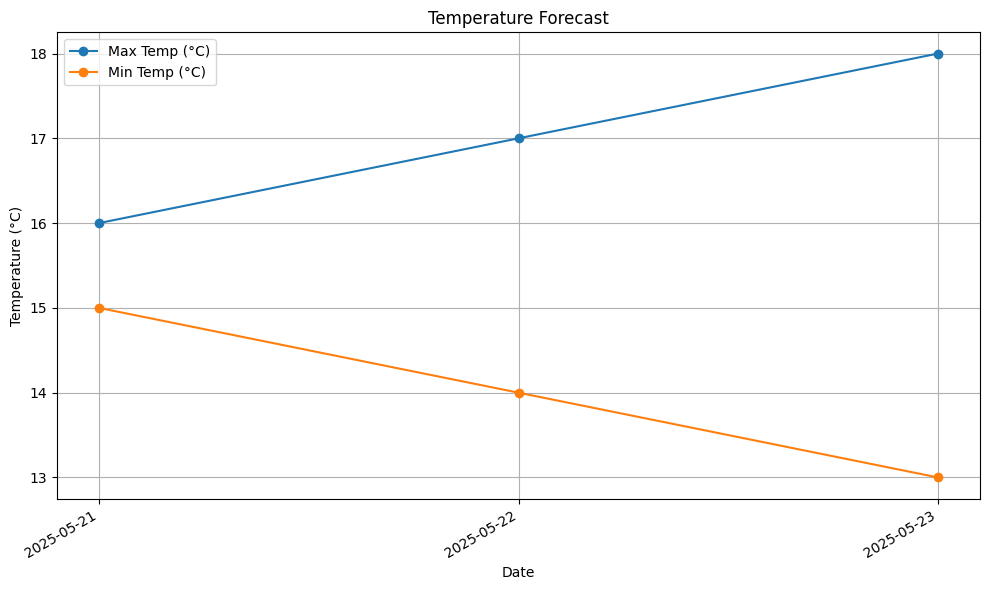


Creating precipitation visualization...


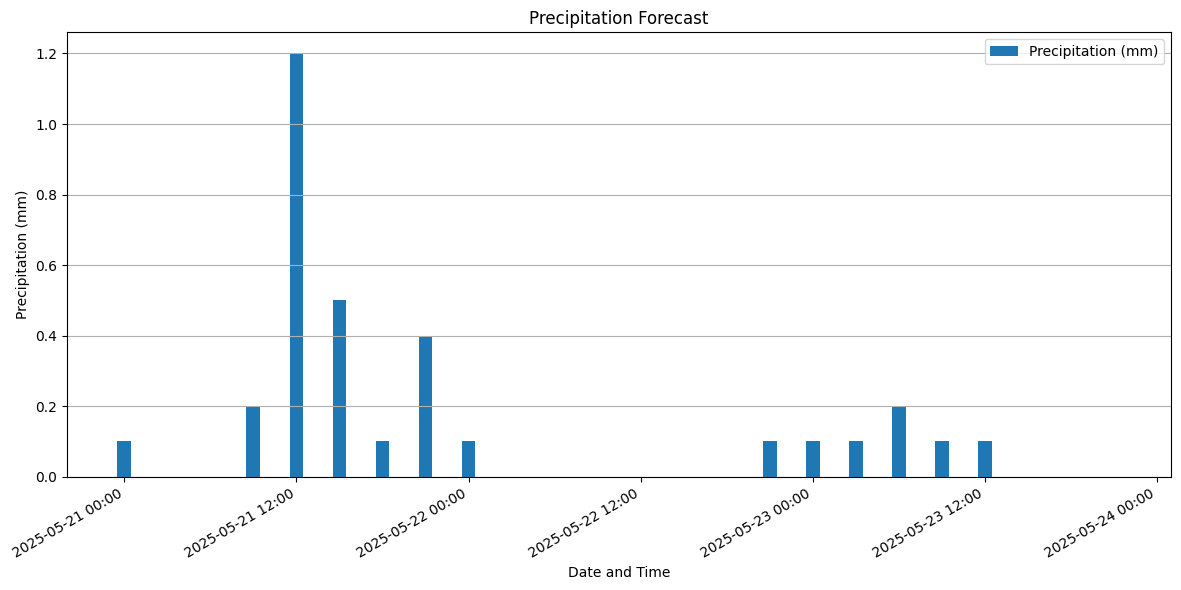

--------------------

--- Testing NLP functions ---
Asking: 'What is the maximum temperature tomorrow?'
AI Response: AI weather questions are currently unavailable due to a server connection issue. Please try again later.
----------
Asking: 'Will it rain today?'
AI Response: AI weather questions are currently unavailable due to a server connection issue. Please try again later.
----------
Asking: 'What's the weather like on the last day of the forecast?'
AI Response: AI weather questions are currently unavailable due to a server connection issue. Please try again later.
----------
Asking: 'Tell me about the weather in London.' (Note: Data is for Sydney)
AI Response: AI weather questions are currently unavailable due to a server connection issue. Please try again later.
--------------------
--- Testing complete ---


In [ ]:
# This section connects the UI widgets to the data fetching, visualization, and NLP functions. It defines the event handlers for the buttons.
#
# %%
# This cell contains the logic that runs when buttons are clicked.

# Variable to store the fetched weather data so it can be used by both graph and QA functions
# Initialize it to None
global_weather_data = None

# Define the event handler for the 'Get Weather & Graphs' button
def on_check_button_clicked(b):
    """
    Handles the click event for the 'Get Weather & Graphs' button.
    Fetches weather data, stores it globally, and displays visualizations.
    """
    global global_weather_data # Declare intent to modify the global variable

    with graph_output: # Direct output to the graph_output widget
        clear_output() # Clear previous output in this area

        location = location_input.value # Get the location from the input widget
        print(f"Fetching weather data for {location}...")

        # Call the data fetching function
        weather_info_dict = get_weather_data(location)

        # Store the fetched data globally so the QA function can access it
        global_weather_data = weather_info_dict

        if global_weather_data:
            print("Generating visualizations...")
            # Create and display the temperature visualization
            create_temperature_visualisation(global_weather_data)
            # Create and display the precipitation visualization
            create_precipitation_visualisation(global_weather_data)
        else:
            # If data fetching failed, display an informative message
            print(f"Could not retrieve weather data for {location} or data was empty.")

# Link the button click event to the handler function
check_button.on_click(on_check_button_clicked)

# Define the event handler for the 'Ask Weather Question' button
def on_qa_button_clicked(b):
    """
    Handles the click event for the 'Ask Weather Question' button.
    Takes the user's question, uses the globally stored weather data,
    and generates a response using the NLP/LLM function.
    """
    with qa_output: # Direct output to the qa_output widget
        clear_output() # Clear previous output in this area

        question = question_input.value # Get the question from the input widget

        if not global_weather_data:
            # If weather data hasn't been fetched yet
            print("Please fetch weather data first by entering a location and clicking 'Get Weather & Graphs'.")
            return

        print(f"Processing question: '{question}'...")

        # Parse the question (currently just returns the question string)
        parsed_question = parse_weather_question(question)

        # Generate the AI response using the parsed question and the global weather data
        response = generate_weather_response(parsed_question, global_weather_data)

        # Display the generated response
        print("AI Answer:")
        print(response)

# Link the button click event to the handler function
qa_button.on_click(on_qa_button_clicked)

# The widgets are displayed in the previous cell.
# This cell just contains the logic that runs when events occur.


# %% [markdown]
# ## 🧪 Testing and Examples
#
# This section provides example code to test individual functions independently, which is useful for debugging and verifying functionality.
#
# %%
# --- Test the get_weather_data function ---
print("--- Testing get_weather_data ---")
test_location = "Sydney" # Use a different location for testing
# The forecast_days argument in your original get_weather_data was not used by fetch_my_weather.get_weather
# The updated get_weather_data function doesn't take forecast_days as it's determined by the API call
# test_forecast_days = 3 # This is no longer needed for the updated function

print(f"Fetching data for {test_location}...")
test_weather_data = get_weather_data(test_location)

if test_weather_data:
    print(f"Successfully retrieved weather data for {test_location}.")
    # Print some keys to confirm structure
    print("Keys in returned dictionary:", test_weather_data.keys())
    # You can add more print statements here to inspect the data structure
    # print("Sample weather data:", test_weather_data.get('weather', [])[:1]) # Print first day's forecast
else:
    print(f"Failed to retrieve weather data for {test_location}.")

print("-" * 20) # Separator

# --- Test the visualization functions (using the test data) ---
print("\n--- Testing visualization functions ---")
if test_weather_data:
    print("Creating temperature visualization...")
    # Call the visualization function, displaying it directly
    create_temperature_visualisation(test_weather_data, output_type='display') # Changed to display

    print("\nCreating precipitation visualization...")
    # Call the visualization function, displaying it directly
    create_precipitation_visualisation(test_weather_data, output_type='display') # Changed to display
else:
    print("Skipping visualization tests as weather data could not be retrieved.")

print("-" * 20) # Separator


# --- Test the NLP functions (requires successful data fetch) ---
print("\n--- Testing NLP functions ---")
if test_weather_data:
    test_question_1 = "What is the maximum temperature tomorrow?"
    test_question_2 = "Will it rain today?"
    test_question_3 = "What's the weather like on the last day of the forecast?"
    test_question_4 = "Tell me about the weather in London." # Test question for a different location (should rely on provided data)


    print(f"Asking: '{test_question_1}'")
    # parse_weather_question just returns the string in this implementation
    parsed_q1 = parse_weather_question(test_question_1)
    # Generate response using the fetched data
    response_q1 = generate_weather_response(parsed_q1, test_weather_data)
    print(f"AI Response: {response_q1}")
    print("-" * 10)

    print(f"Asking: '{test_question_2}'")
    parsed_q2 = parse_weather_question(test_question_2)
    response_q2 = generate_weather_response(parsed_q2, test_weather_data)
    print(f"AI Response: {response_q2}")
    print("-" * 10)

    print(f"Asking: '{test_question_3}'")
    parsed_q3 = parse_weather_question(test_question_3)
    response_q3 = generate_weather_response(parsed_q3, test_weather_data)
    print(f"AI Response: {response_q3}")
    print("-" * 10)

    print(f"Asking: '{test_question_4}' (Note: Data is for {test_location})")
    parsed_q4 = parse_weather_question(test_question_4)
    response_q4 = generate_weather_response(parsed_q4, test_weather_data)
    print(f"AI Response: {response_q4}") # The AI should ideally state it only has data for Sydney

else:
    print("Skipping NLP tests as weather data could not be retrieved.")

print("-" * 20) # Separator
print("--- Testing complete ---")

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function


In [ ]:
# Fallback: Try interactive input. This might fail in non-interactive environments.
try:
    print("Attempting to prompt for API key interactively...")
    # This should not ask if the env var is set to ''
    api_key_input = pyip.inputPassword('Enter your Hands-on-AI API key: ')
    os.environ['HANDS_ON_AI_API_KEY'] = api_key_input
    print("API key set from interactive input.")
except Exception as e:
    print(f"Could not get API key interactively: {e}")
    print("Please set the HANDS_ON_AI_API_KEY environment variable before running the notebook.")
    os.environ['HANDS_ON_AI_API_KEY'] = '' # Set to empty string if neither method works

Attempting to prompt for API key interactively...
Enter your Hands-on-AI API key: Could not get API key interactively: (25, 'Inappropriate ioctl for device')
Please set the HANDS_ON_AI_API_KEY environment variable before running the notebook.
